In [328]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [329]:
def read_img(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img

img = read_img("./data/dogs-vs-cats/train/cat.10000.jpg")

In [330]:
def gaussian_blur(img, kernel_size=11, sigma=5):
    def gaussion_filter(channels):
        kernel_1D = tf.range(-kernel_size // 2 + 1.0, (kernel_size // 2) + 1.0)
        xx, yy = tf.meshgrid(kernel_1D, kernel_1D)
        kernel = tf.exp(-(xx ** 2 + yy ** 2) / (2.0 * sigma ** 2))
        kernel = kernel / tf.reduce_sum(kernel)
        kernel = tf.tile(kernel[..., tf.newaxis], [1, 1, channels])
        return kernel
    
    gaussian_kernel = gaussion_filter(tf.shape(img)[-1])
    return gaussian_kernel[..., tf.newaxis]

In [522]:
kernel = gaussian_blur(img, 11, 3)

In [523]:
image = tf.reshape(img, [1, img.shape[0], img.shape[1], 1], name='image')
conv = tf.nn.conv2d(image, kernel, [1, 1, 1, 1], "SAME")

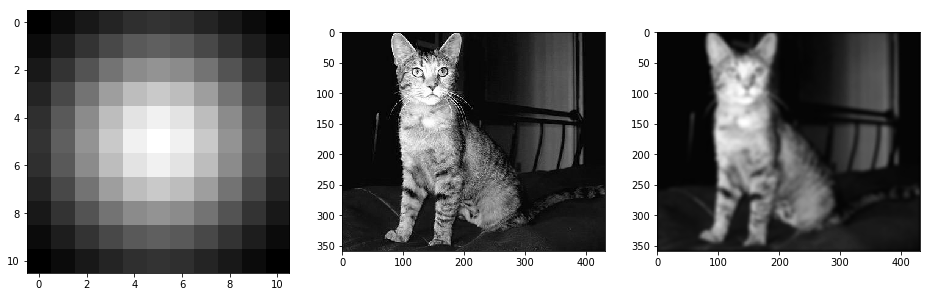

In [524]:
fig, ax = plt.subplots(1, 3, figsize=(16, 16))
ax[0].imshow(tf.reshape(kernel, (kernel.shape[0], kernel.shape[1])), interpolation='none', cmap='gray')
ax[1].imshow(tf.reshape(img, (img.shape[0], img.shape[1])), interpolation='none', cmap='gray')
ax[2].imshow(tf.reshape(conv[0], (conv.shape[1], conv.shape[2])), interpolation='none', cmap='gray')

In [525]:
def convolution(image, kernel, verbose = True, average = False):
    image_row, image_col = image.shape
    kernel_row, kernel_col, _, _ = kernel.shape
    
    output = np.zeros((image_row, image_col))
    
    pad_height = (kernel_row - 1) // 2
    pad_width = (kernel_col - 1) // 2
    
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    
    padded_image[pad_height: padded_image.shape[0] - pad_height, pad_width: padded_image.shape[1] - pad_width] = image
    
    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(np.matmul(np.reshape(kernel, (kernel_row, kernel_col)), padded_image[row:row + kernel_row, col:col + kernel_col]))
            if average:
                output[row, col] = np.divide(output[row, col], np.multiply(kernel.shape[0], kernel.shape[1]))
                
    if verbose:
        fig, ax = plt.subplots(1, 3, figsize=(16, 16))
        ax[0].imshow(image, cmap='gray')
        ax[0].set_title("Given Image")
        ax[1].imshow(padded_image, cmap='gray')
        ax[1].set_title("Padded Image")
        ax[2].imshow(output, cmap='gray')
        ax[2].set_title("Gaussian Image")
        plt.show()
                
    return output

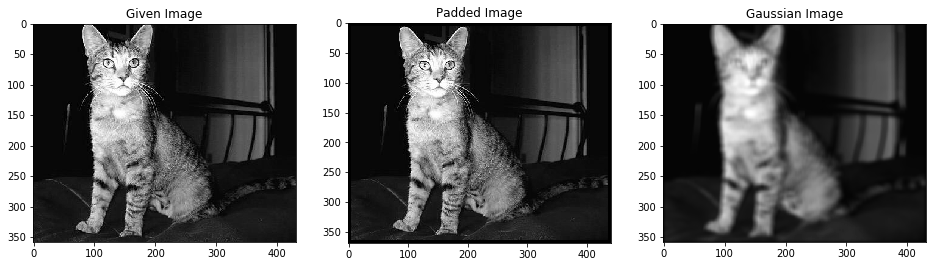

array([[0.00088852, 0.0010366 , 0.00118469, ..., 0.00118469, 0.0010366 ,
        0.00088852],
       [0.00109793, 0.00128091, 0.0014639 , ..., 0.0014639 , 0.00128091,
        0.00109793],
       [0.00127519, 0.00148772, 0.00170025, ..., 0.00170025, 0.00148772,
        0.00127519],
       ...,
       [0.00606184, 0.00702773, 0.00786515, ..., 0.00261667, 0.0022898 ,
        0.00196178],
       [0.00538074, 0.00621737, 0.00691562, ..., 0.00217534, 0.00190293,
        0.00163052],
       [0.00448464, 0.00516172, 0.00570638, ..., 0.00170046, 0.00148746,
        0.00127447]])

In [526]:
sample_image = np.array([[255,128,80], [255,128,80], [255,128,80]])
convolution(tf.reshape(image, (359, 431)), kernel, average=True)